In [1]:
import seaborn as sn
sn.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
data=sn.load_dataset('planets')
data

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [3]:
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
data.describe(include='all')

,method,number,orbital_period,mass,distance,year
count,1035,1035.000000,992.000000,513.000000,808.000000,1035.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Radial Velocity,NaN,NaN,NaN,NaN,NaN
freq,553,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,NaN,1.240976,26014.728304,3.818617,733.116493,3.972567
min,NaN,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,NaN,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,NaN,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,NaN,2.000000,526.005000,3.040000,178.500000,2012.000000


In [5]:
data.isna().sum().sum()

792

In [6]:
data.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [7]:
data['mass'].fillna(data['mass'].mean(),inplace=True)
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [8]:
data.isna().sum()

method              0
number              0
orbital_period     43
mass                0
distance          227
year                0
dtype: int64

In [9]:
data['distance'].fillna(data['distance'].max(),inplace=True)
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [10]:
data.isna().sum()

method             0
number             0
orbital_period    43
mass               0
distance           0
year               0
dtype: int64

In [11]:
data['orbital_period'].fillna(data['orbital_period'].std(),inplace=True)
data.isna().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [12]:
data.isna().sum().sum()

0

In [13]:
x=data[['orbital_period','mass','distance','year']]
y=data['number']

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [17]:
x_train.head()

,orbital_period,mass,distance,year
142,61.1166,2.275600,4.70,1998
321,2371.0000,25.000000,37.05,2008
441,83.8880,11.680000,40.57,1989
374,441.4700,2.638161,27.46,2003
533,1523.0000,2.600000,44.05,2009


In [18]:
y_train

array([3, 0, 0, 1, 0, 1, 1, 5, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 4, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 2, 5, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 4, 1, 1, 0, 1, 0, 1, 2, 1, 4, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 5, 1, 0, 0, 0, 1, 0, 1, 0, 2, 3, 0,
       0, 0, 3, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 3, 4, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 4,
       0, 1, 0, 1, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 3, 0, 0, 1, 0, 1, 1, 0, 3,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 5, 0, 1,
       0, 0, 0, 1, 0, 5, 0, 1, 0, 1, 2, 0, 0, 0, 4, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 6, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 1, 0, 0,

In [19]:
import xgboost as xgb
reg=xgb.XGBClassifier(n_estimators=10,learning_rate=0.01)
clf=reg.fit(x_train,y_train)
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [20]:
reg.score(x_test,y_test)

0.6618357487922706

In [21]:
y_pred=clf.predict(x_test)
y_pred

array([3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 6, 1, 0, 0, 0, 2, 0, 0, 5, 2, 1,
       0, 1, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 3, 0,
       1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 6, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.72      0.80       148
           1       0.43      0.56      0.49        41
           2       0.20      0.44      0.28         9
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.33      0.50      0.40         2
           6       0.67      1.00      0.80         2

    accuracy                           0.66       207
   macro avg       0.36      0.46      0.39       207
weighted avg       0.74      0.66      0.69       207



<AxesSubplot:>

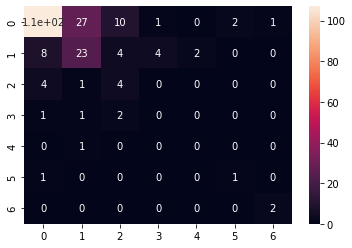

In [23]:
cm=metrics.confusion_matrix(y_pred,y_test)
sn.heatmap(cm,annot=True)

In [24]:
metrics.confusion_matrix(y_pred,y_test)

array([[107,  27,  10,   1,   0,   2,   1],
       [  8,  23,   4,   4,   2,   0,   0],
       [  4,   1,   4,   0,   0,   0,   0],
       [  1,   1,   2,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   2]], dtype=int64)

In [25]:
metrics.accuracy_score(y_pred,y_test)

0.6618357487922706

In [26]:
metrics.recall_score(y_pred,y_test,average='macro')

0.46119900388193075

In [27]:
metrics.precision_score(y_pred,y_test,average='micro')

0.6618357487922706

In [28]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators': [50, 100, 150],'learning_rate': [0.01, 0.1, 1],'max_depth': [3, 5, 7]}
                      # 'subsample': [0.5, 0.7, 1], 'colsample_bytree': [0.5, 0.7, 1]
xgb_hpt=GridSearchCV(reg,params,cv=5)
xgb_hpt.fit(x,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leave

In [29]:
xgb_hpt.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [30]:
xgb_hpt.best_index_

9

In [31]:
xgb_hpt.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [32]:
xgb_hpt.best_score_

0.6579710144927537

In [33]:
xgb_hpt.cv_results_

{'mean_fit_time': array([0.28439331, 0.61334796, 0.97786365, 0.43692017, 0.90982847,
        1.3375463 , 0.49695778, 1.02785988, 1.83965263, 0.28780112,
        0.54301095, 0.7791038 , 0.38635883, 0.74447446, 1.05456157,
        0.47475762, 0.89361715, 1.2810041 , 0.25425286, 0.46571312,
        0.70298367, 0.40089154, 0.69624767, 0.80689597, 0.36222186,
        0.62182493, 1.03152184]),
 'std_fit_time': array([0.01200668, 0.06679665, 0.22370778, 0.05189539, 0.09327514,
        0.22619419, 0.02086629, 0.07054064, 0.09475935, 0.02005734,
        0.0127905 , 0.02274087, 0.01821409, 0.02136857, 0.02711424,
        0.02284678, 0.02802416, 0.01572055, 0.00684412, 0.01264439,
        0.07205555, 0.03085227, 0.07752622, 0.02154114, 0.0103278 ,
        0.02211562, 0.07625328]),
 'mean_score_time': array([0.00673194, 0.00778184, 0.00897012, 0.007026  , 0.00849442,
        0.0093854 , 0.00780849, 0.00942369, 0.01107411, 0.00686116,
        0.00749893, 0.00831466, 0.00715995, 0.00824275, 0.009743

In [34]:
import pandas as pd
results=pd.DataFrame(xgb_hpt.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.284393,0.012007,0.006732,0.000734,0.01,3,50,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.574879,0.589372,0.545894,0.695652,0.763285,0.633816,0.082177,7
1,0.613348,0.066797,0.007782,0.000317,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.565217,0.637681,0.541063,0.685990,0.743961,0.634783,0.075064,6
2,0.977864,0.223708,0.008970,0.000689,0.01,3,150,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.599034,0.623188,0.536232,0.681159,0.739130,0.635749,0.069512,5
3,0.436920,0.051895,0.007026,0.000300,0.01,5,50,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.579710,0.642512,0.560386,0.695652,0.729469,0.641546,0.064914,3
4,0.909828,0.093275,0.008494,0.001084,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.574879,0.666667,0.584541,0.695652,0.719807,0.648309,0.058564,2
5,1.337546,0.226194,0.009385,0.000583,0.01,5,150,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.589372,0.666667,0.584541,0.647343,0.714976,0.640580,0.049038,4
6,0.496958,0.020866,0.007808,0.000460,0.01,7,50,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.608696,0.652174,0.550725,0.613527,0.681159,0.621256,0.044128,8
7,1.027860,0.070541,0.009424,0.000385,0.01,7,100,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.589372,0.652174,0.555556,0.608696,0.685990,0.618357,0.046033,10
8,1.839653,0.094759,0.011074,0.001172,0.01,7,150,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.584541,0.652174,0.545894,0.603865,0.681159,0.613527,0.048116,12
9,0.287801,0.020057,0.006861,0.000357,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.594203,0.652174,0.584541,0.710145,0.748792,0.657971,0.063973,1


In [36]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
xgb_cv=cross_val_score(reg,x_train,y_train,cv=5)
xgb_cv

array([0.60843373, 0.71084337, 0.74698795, 0.70909091, 0.6969697 ])

In [37]:
xgb_cv.mean()

0.694465133260314

In [39]:
xgb_cv.std()*2

0.09229726269516274